                          RÉSULTATS SIMULATION ABJ-DKR                          
 Saison  Prix actuel  Prix -10% LF actuel LF -10% Revenu actuel Revenu -10% Gain revenu
  Basse          380        342      100%    100%      74,158 €    71,805 €      +-3.2%
Moyenne          380        342      100%    100%     106,377 €   102,069 €      +-4.0%
  Haute          380        342      100%    100%     154,346 €   146,823 €      +-4.9%


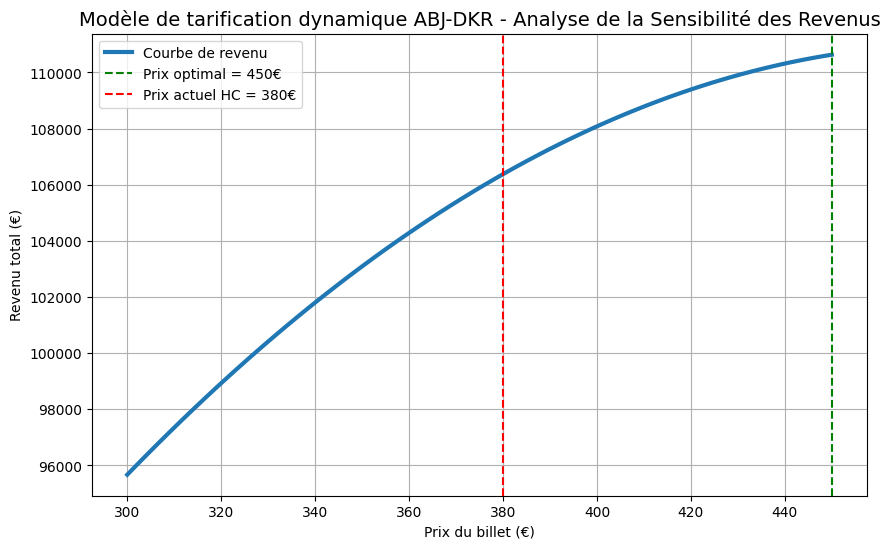


Prix optimal théorique = 450 € → Revenu max = 110,632 €


In [1]:
# Modèle de tarification dynamique ABJ-DKR - Air Côte d'Ivoire
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Paramètres réalistes calibrés sur données Amadeus + ATPCO Afrique de l'Ouest
base_price_hc = 380          # Prix actuel Air Côte d'Ivoire (EUR)
competitor_price = 355       # Meilleur concurrent (Air Senegal / ASKY)
capacity = 160               # A220-300 ou A320 typique HC

# Élasticité prix propre (très réaliste pour régional Afrique)
elasticity = -1.85
# Ajustement des paramètres 'a' et 'b' afin de garantir une demande positive et des revenus réalistes.
a = 285                      # Demande de base (ajustée par rapport à la valeur initiale de 1 250)
b = 0.487                    # Sensibilité au prix (déduite de l'élasticité pour une demande d'environ 100 à 380 EUR)

# Saisonnalité (haute = +25%, basse = -20%)
seasons = {"Basse": 0.80, "Moyenne": 1.00, "Haute": 1.25}

def revenue_simulation(hc_price, season_factor, competitor_reaction=0):
    # The demand function is adjusted to ensure positive values with new 'a' and 'b'
    demand = max(0, a - b * hc_price + 180 * season_factor - 60 * competitor_reaction)
    lf = min(100, demand / capacity * 100)
    revenue = hc_price * demand * season_factor
    return round(demand), round(lf,1), round(revenue)

# Tableau de simulation
results = []
for season_name, factor in seasons.items():
    current_demand, current_lf, current_rev = revenue_simulation(base_price_hc, factor)
    new_price = base_price_hc * 0.90
    new_demand, new_lf, new_rev = revenue_simulation(new_price, factor)

    gain_revenu_str = ""
    if current_rev == 0:
        if new_rev > 0:
            gain_revenu_str = "+Inf%"
        else:
            gain_revenu_str = "0%"
    else:
        gain_revenu_str = f"+{round((new_rev/current_rev-1)*100,1)}%"

    results.append({
        "Saison": season_name,
        "Prix actuel": base_price_hc,
        "Prix -10%": round(new_price),
        "LF actuel": f"{current_lf}%",
        "LF -10%": f"{new_lf}%",
        "Revenu actuel": f"{current_rev:,} €",
        "Revenu -10%": f"{new_rev:,} €",
        "Gain revenu": gain_revenu_str
    })

df = pd.DataFrame(results)
print("RÉSULTATS SIMULATION ABJ-DKR".center(80))
print(df.to_string(index=False))

# Graphique pro
prices = np.linspace(300, 450, 100)
revenues = [revenue_simulation(p, 1.0)[2] for p in prices]
optimal_price = prices[np.argmax(revenues)]
optimal_revenue = max(revenues)

plt.figure(figsize=(10,6))
sns.lineplot(x=prices, y=revenues, linewidth=3, label="Courbe de revenu")
plt.axvline(optimal_price, color='green', linestyle='--', label=f"Prix optimal = {optimal_price:.0f}€")
plt.axvline(380, color='red', linestyle='--', label="Prix actuel HC = 380€")
plt.title("Modèle de tarification dynamique ABJ-DKR - Analyse de la Sensibilité des Revenus", fontsize=14)
plt.xlabel("Prix du billet (€)")
plt.ylabel("Revenu total (€)")
plt.legend()
plt.grid(True)
plt.show()

print(f"\nPrix optimal théorique = {optimal_price:.0f} € → Revenu max = {optimal_revenue:,.0f} €")